In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#load data

precipitation = pd.read_csv('data/folsomlake_daily_precipitation.csv',header=7)
storage = pd.read_csv('data/folsomlake_daily_storage.csv',header=7)
release = pd.read_csv('data/folsomlake_daily_release.csv',header=7)
inflow = pd.read_csv('data/folsomlake_daily_inflow.csv',header=7) #avg cfs 24 hr
evaporation = pd.read_csv('data/folsomlake_daily_evaporation.csv',header=7) #avg cfs 24 hr
storage.head()

,Location,Parameter,Result,Units,Timestep,Aggregation,Datetime (UTC)
0,Folsom Lake Dam and Powerplant,Lake/Reservoir Storage,5300.0,af,daily,instant,1955-03-01 08:00:00
1,Folsom Lake Dam and Powerplant,Lake/Reservoir Storage,5500.0,af,daily,instant,1955-03-02 08:00:00
2,Folsom Lake Dam and Powerplant,Lake/Reservoir Storage,4900.0,af,daily,instant,1955-03-03 08:00:00
3,Folsom Lake Dam and Powerplant,Lake/Reservoir Storage,5000.0,af,daily,instant,1955-03-04 08:00:00
4,Folsom Lake Dam and Powerplant,Lake/Reservoir Storage,4900.0,af,daily,instant,1955-03-05 08:00:00


In [3]:
#fix data

#drop unnecessary columns

drop_list = ['Location','Parameter','Timestep','Aggregation']

storage.drop(drop_list,axis=1,inplace=True)
precipitation.drop(drop_list,axis=1,inplace=True)
evaporation.drop(drop_list,axis=1,inplace=True)
release.drop(drop_list,axis=1,inplace=True)
inflow.drop(drop_list,axis=1,inplace=True)

In [4]:
evaporation.head(10)

,Result,Units,Datetime (UTC)
0,0.0,cfs,1966-01-01 08:00:00
1,0.0,cfs,1966-01-02 08:00:00
2,28.0,cfs,1966-01-03 08:00:00
3,8.0,cfs,1966-01-04 08:00:00
4,0.0,cfs,1966-01-05 08:00:00
5,0.0,cfs,1966-01-06 08:00:00
6,14.0,cfs,1966-01-07 08:00:00
7,11.0,cfs,1966-01-08 08:00:00
8,11.0,cfs,1966-01-09 08:00:00
9,6.0,cfs,1966-01-10 08:00:00


In [5]:
#convert cols to datetime

storage['Datetime (UTC)']= pd.to_datetime(storage['Datetime (UTC)'])
precipitation['Datetime (UTC)']= pd.to_datetime(precipitation['Datetime (UTC)'])
evaporation['Datetime (UTC)']= pd.to_datetime(evaporation['Datetime (UTC)'])
release['Datetime (UTC)']= pd.to_datetime(release['Datetime (UTC)'])
inflow['Datetime (UTC)']= pd.to_datetime(inflow['Datetime (UTC)'])


#set datetime as index

storage.set_index('Datetime (UTC)',inplace=True)
precipitation.set_index('Datetime (UTC)',inplace=True)
evaporation.set_index('Datetime (UTC)',inplace=True)
release.set_index('Datetime (UTC)',inplace=True)
inflow.set_index('Datetime (UTC)',inplace=True)

storage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23013 entries, 1955-03-01 08:00:00 to 2020-03-02 08:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Result  23013 non-null  float64
 1   Units   23013 non-null  object 
dtypes: float64(1), object(1)
memory usage: 539.4+ KB


<AxesSubplot:xlabel='Datetime (UTC)'>

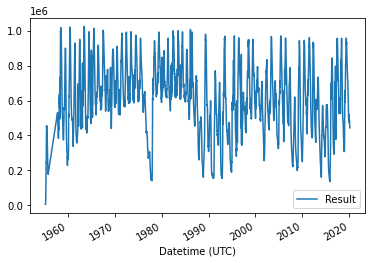

In [6]:
storage.plot()

<AxesSubplot:xlabel='Datetime (UTC)'>

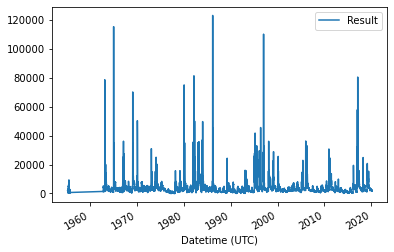

In [7]:
release.plot()

In [15]:
#load data from NOAA on colfax station data

noaa = pd.read_csv('data/colfax_data.csv')

noaa.info()

noaa['DATE']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21328 entries, 0 to 21327
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  21328 non-null  object 
 1   NAME     21328 non-null  object 
 2   DATE     21328 non-null  object 
 3   DAPR     35 non-null     float64
 4   MDPR     36 non-null     float64
 5   PRCP     21193 non-null  float64
 6   SNOW     19086 non-null  float64
 7   SNWD     18471 non-null  float64
 8   TMAX     20967 non-null  float64
 9   TMIN     20964 non-null  float64
 10  TOBS     13990 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.8+ MB


0        1960-03-01
1        1960-03-02
2        1960-03-03
3        1960-03-04
4        1960-03-05
            ...    
21323    2020-02-26
21324    2020-02-27
21325    2020-02-28
21326    2020-02-29
21327    2020-03-01
Name: DATE, Length: 21328, dtype: object

In [16]:
noaa.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,USC00041912,"COLFAX, CA US",1960-03-01,NaN,NaN,0.00,0.0,0.0,54.0,34.0,44.0
1,USC00041912,"COLFAX, CA US",1960-03-02,NaN,NaN,0.00,0.0,0.0,51.0,22.0,49.0
2,USC00041912,"COLFAX, CA US",1960-03-03,NaN,NaN,0.00,0.0,0.0,50.0,29.0,48.0
3,USC00041912,"COLFAX, CA US",1960-03-04,NaN,NaN,0.58,0.0,0.0,50.0,40.0,50.0
4,USC00041912,"COLFAX, CA US",1960-03-05,NaN,NaN,1.65,0.0,0.0,50.0,44.0,49.0


In [17]:
#clean noaa

noaa.drop(['STATION','NAME','DAPR','MDPR'],axis=1,inplace=True)

noaa['DATE'] = pd.to_datetime(noaa['DATE'])

noaa.set_index('DATE',inplace=True)

noaa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21328 entries, 1960-03-01 to 2020-03-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    21193 non-null  float64
 1   SNOW    19086 non-null  float64
 2   SNWD    18471 non-null  float64
 3   TMAX    20967 non-null  float64
 4   TMIN    20964 non-null  float64
 5   TOBS    13990 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [18]:
#noaa['TAVG'].isna().value_counts()

noaa['TOBS']

DATE
1960-03-01    44.0
1960-03-02    49.0
1960-03-03    48.0
1960-03-04    50.0
1960-03-05    49.0
              ... 
2020-02-26     NaN
2020-02-27     NaN
2020-02-28     NaN
2020-02-29     NaN
2020-03-01     NaN
Name: TOBS, Length: 21328, dtype: float64